In [8]:
import scipy.cluster.hierarchy as sch
import pandas as pd
from scgenome import cncluster
from scgenome import cnplot, utils
import numpy as np
import matplotlib.pyplot as plt

idx: [5 4 3 2 1 0]
['c1', 'c2', 'c3', 'c4', 'c5', 'c6']
[0, 1, 2, 3, 4, 5]


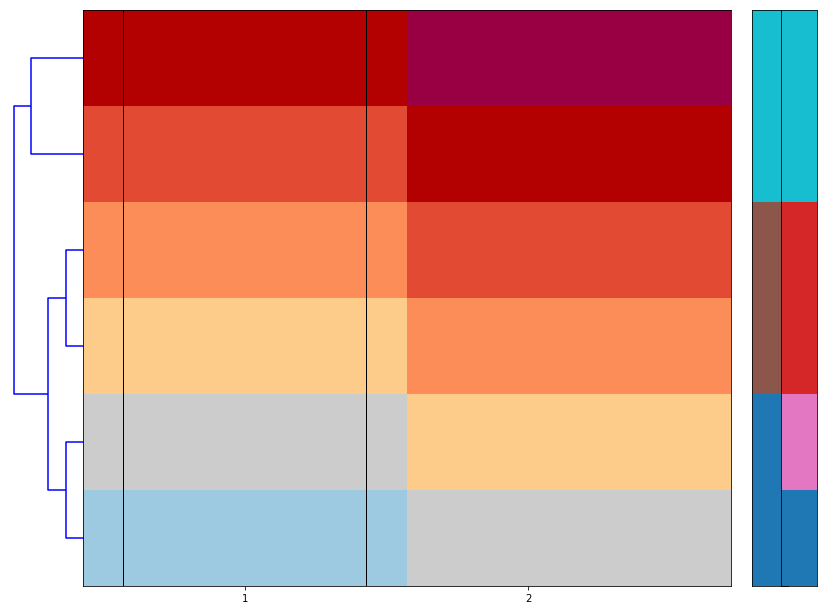

In [2]:
measurement = np.array([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3],
    [4,4,4,4],
    [5,5,5,5],
    [6,6,6,6],
])

linkage = np.array([
    [0,1,1,2], # 6
    [2,3,1,2], # 7
    [6,7,2,4], # 8
    [4,5,3,2],  # 9
    [8,9,4,6]
], dtype="float")

cn_data = pd.DataFrame(
    data=[
        #chr start end reads gc  copy state cell_id sample_id library_id origin_id origin_id_int, bhc_cluster_id
        ["1",  0,    1,  1,    -1, 1, 1,    "c1",   "s",      "l",       "o1",     1,             0],
        ["1",  2,    3,  1,    -1, 1, 1,    "c1",   "s",      "l",       "o1",     1,             0],
        ["1",  4,    5,  1,    -1, 1, 1,    "c1",   "s",      "l",       "o1",     1,             0],
        ["1",  6,    7,  1,    -1, 1, 1,    "c1",   "s",      "l",       "o1",     1,             0],
        ["2",  0,    1,  1,    -1, 1, 2,    "c1",   "s",      "l",       "o1",     1,             0],
        ["2",  2,    3,  1,    -1, 1, 2,    "c1",   "s",      "l",       "o1",     1,             0],
        ["2",  4,    5,  1,    -1, 1, 2,    "c1",   "s",      "l",       "o1",     1,             0],
        ["2",  6,    7,  1,    -1, 1, 2,    "c1",   "s",      "l",       "o1",     1,             0],
        
        ["1",  0,    1,  2,    -2, 2, 2,    "c2",   "s",      "l",       "o1",     3,             0],
        ["1",  2,    3,  2,    -2, 2, 2,    "c2",   "s",      "l",       "o1",     3,             0],
        ["1",  4,    5,  2,    -2, 2, 2,    "c2",   "s",      "l",       "o1",     3,             0],
        ["1",  6,    7,  2,    -2, 2, 2,    "c2",   "s",      "l",       "o1",     3,             0],
        ["2",  0,    1,  2,    -2, 2, 3,    "c2",   "s",      "l",       "o1",     3,             0],
        ["2",  2,    3,  2,    -2, 2, 3,    "c2",   "s",      "l",       "o1",     3,             0],
        ["2",  4,    5,  2,    -2, 2, 3,    "c2",   "s",      "l",       "o1",     3,             0],
        ["2",  6,    7,  2,    -2, 2, 3,    "c2",   "s",      "l",       "o1",     3,             0],
       
        ["1",  0,    1,  3,    -3, 3, 3,    "c3",   "s",      "l",       "o2",     2,             1],
        ["1",  2,    3,  3,    -3, 3, 3,    "c3",   "s",      "l",       "o2",     2,             1],
        ["1",  4,    5,  3,    -3, 3, 3,    "c3",   "s",      "l",       "o2",     2,             1],
        ["1",  6,    7,  3,    -3, 3, 3,    "c3",   "s",      "l",       "o2",     2,             1],
        ["2",  0,    1,  3,    -3, 3, 4,    "c3",   "s",      "l",       "o2",     2,             1],
        ["2",  2,    3,  3,    -3, 3, 4,    "c3",   "s",      "l",       "o2",     2,             1],
        ["2",  4,    5,  3,    -3, 3, 4,    "c3",   "s",      "l",       "o2",     2,             1],
        ["2",  6,    7,  3,    -3, 3, 4,    "c3",   "s",      "l",       "o2",     2,             1],
       
        ["1",  0,    1,  4,    -4, 4, 4,    "c4",   "s",      "l",       "o2",     2,             1],
        ["1",  2,    3,  4,    -4, 4, 4,    "c4",   "s",      "l",       "o2",     2,             1],
        ["1",  4,    5,  4,    -4, 4, 4,    "c4",   "s",      "l",       "o2",     2,             1],
        ["1",  6,    7,  4,    -4, 4, 4,    "c4",   "s",      "l",       "o2",     2,             1],
        ["2",  0,    1,  4,    -4, 4, 5,    "c4",   "s",      "l",       "o2",     2,             1],
        ["2",  2,    3,  4,    -4, 4, 5,    "c4",   "s",      "l",       "o2",     2,             1],
        ["2",  4,    5,  4,    -4, 4, 5,    "c4",   "s",      "l",       "o2",     2,             1],
        ["2",  6,    7,  4,    -4, 4, 5,    "c4",   "s",      "l",       "o2",     2,             1],
        
        ["1",  0,    1,  5,    -5, 5, 5,    "c5",   "s",      "l",       "o4",     4,             2],
        ["1",  2,    3,  5,    -5, 5, 5,    "c5",   "s",      "l",       "o4",     4,             2],
        ["1",  4,    5,  5,    -5, 5, 5,    "c5",   "s",      "l",       "o4",     4,             2],
        ["1",  6,    7,  5,    -5, 5, 5,    "c5",   "s",      "l",       "o4",     4,             2],
        ["2",  0,    1,  5,    -5, 5, 6,    "c5",   "s",      "l",       "o4",     4,             2],
        ["2",  2,    3,  5,    -5, 5, 6,    "c5",   "s",      "l",       "o4",     4,             2],
        ["2",  4,    5,  5,    -5, 5, 6,    "c5",   "s",      "l",       "o4",     4,             2],
        ["2",  6,    7,  5,    -5, 5, 6,    "c5",   "s",      "l",       "o4",     4,             2],
        
        ["1",  0,    1,  6,    -6, 6, 6,    "c6",   "s",      "l",       "o4",     4,             2],
        ["1",  2,    3,  6,    -6, 6, 6,    "c6",   "s",      "l",       "o4",     4,             2],
        ["1",  4,    5,  6,    -6, 6, 6,    "c6",   "s",      "l",       "o4",     4,             2],
        ["1",  6,    7,  6,    -6, 6, 6,    "c6",   "s",      "l",       "o4",     4,             2],
        ["2",  0,    1,  6,    -6, 6, 7,    "c6",   "s",      "l",       "o4",     4,             2],
        ["2",  2,    3,  6,    -6, 6, 7,    "c6",   "s",      "l",       "o4",     4,             2],
        ["2",  4,    5,  6,    -6, 6, 7,    "c6",   "s",      "l",       "o4",     4,             2],
        ["2",  6,    7,  6,    -6, 6, 7,    "c6",   "s",      "l",       "o4",     4,             2],
        
    ],
    columns=['chr', 'start', 'end', 'reads', 'gc', 'copy', 'state', 'cell_id',
             'sample_id', 'library_id', 'origin_id', 'origin_id_int', 'bhc_cluster_id']
)

fig = plt.figure(figsize=(10, 8))
bimatrix_data = cnplot.plot_clustered_cell_cn_matrix_figure(
    fig, cn_data, "state", cluster_field_name="bhc_cluster_id",
    linkage=linkage, origin_field_name="origin_id_int", max_cn=8)
leaves = sch.dendrogram(linkage, orientation="left", no_plot=True)["leaves"]
cell_ids = ["c1","c2","c3","c4","c5", "c6"]
print([cell_ids[i] for i in leaves])
print(leaves)

idx: [3 2 1 0 4]
['c5', 'c1', 'c2', 'c3', 'c4']


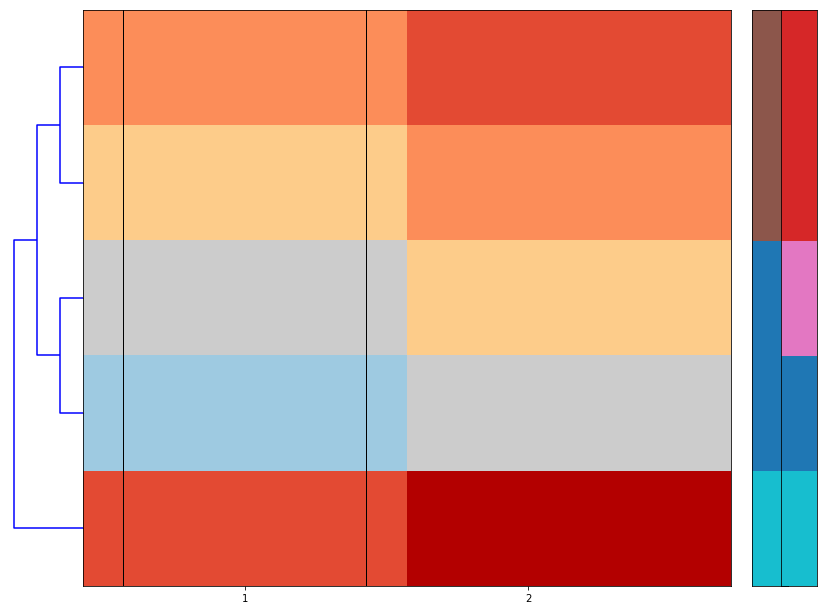

In [3]:
measurement = np.array([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3],
    [4,4,4,4],
    [5,5,5,5],
])

linkage = np.array([
    [0,1,1,2], # 5
    [2,3,1,2], # 6
    [5,6,2,4], # 7
    [4,7,3,2],  # 8
], dtype="float")

cn_data = pd.DataFrame(
    data=[
        #chr start end reads gc  copy state cell_id sample_id library_id origin_id origin_id_int, bhc_cluster_id
        ["1",  0,    1,  1,    -1, 1, 1,    "c1",   "s",      "l",       "o1",     1,             0],
        ["1",  2,    3,  1,    -1, 1, 1,    "c1",   "s",      "l",       "o1",     1,             0],
        ["1",  4,    5,  1,    -1, 1, 1,    "c1",   "s",      "l",       "o1",     1,             0],
        ["1",  6,    7,  1,    -1, 1, 1,    "c1",   "s",      "l",       "o1",     1,             0],
        ["2",  0,    1,  1,    -1, 1, 2,    "c1",   "s",      "l",       "o1",     1,             0],
        ["2",  2,    3,  1,    -1, 1, 2,    "c1",   "s",      "l",       "o1",     1,             0],
        ["2",  4,    5,  1,    -1, 1, 2,    "c1",   "s",      "l",       "o1",     1,             0],
        ["2",  6,    7,  1,    -1, 1, 2,    "c1",   "s",      "l",       "o1",     1,             0],
        
        ["1",  0,    1,  2,    -2, 2, 2,    "c2",   "s",      "l",       "o1",     3,             0],
        ["1",  2,    3,  2,    -2, 2, 2,    "c2",   "s",      "l",       "o1",     3,             0],
        ["1",  4,    5,  2,    -2, 2, 2,    "c2",   "s",      "l",       "o1",     3,             0],
        ["1",  6,    7,  2,    -2, 2, 2,    "c2",   "s",      "l",       "o1",     3,             0],
        ["2",  0,    1,  2,    -2, 2, 3,    "c2",   "s",      "l",       "o1",     3,             0],
        ["2",  2,    3,  2,    -2, 2, 3,    "c2",   "s",      "l",       "o1",     3,             0],
        ["2",  4,    5,  2,    -2, 2, 3,    "c2",   "s",      "l",       "o1",     3,             0],
        ["2",  6,    7,  2,    -2, 2, 3,    "c2",   "s",      "l",       "o1",     3,             0],
       
        ["1",  0,    1,  3,    -3, 3, 3,    "c3",   "s",      "l",       "o2",     2,             1],
        ["1",  2,    3,  3,    -3, 3, 3,    "c3",   "s",      "l",       "o2",     2,             1],
        ["1",  4,    5,  3,    -3, 3, 3,    "c3",   "s",      "l",       "o2",     2,             1],
        ["1",  6,    7,  3,    -3, 3, 3,    "c3",   "s",      "l",       "o2",     2,             1],
        ["2",  0,    1,  3,    -3, 3, 4,    "c3",   "s",      "l",       "o2",     2,             1],
        ["2",  2,    3,  3,    -3, 3, 4,    "c3",   "s",      "l",       "o2",     2,             1],
        ["2",  4,    5,  3,    -3, 3, 4,    "c3",   "s",      "l",       "o2",     2,             1],
        ["2",  6,    7,  3,    -3, 3, 4,    "c3",   "s",      "l",       "o2",     2,             1],
       
        ["1",  0,    1,  4,    -4, 4, 4,    "c4",   "s",      "l",       "o2",     2,             1],
        ["1",  2,    3,  4,    -4, 4, 4,    "c4",   "s",      "l",       "o2",     2,             1],
        ["1",  4,    5,  4,    -4, 4, 4,    "c4",   "s",      "l",       "o2",     2,             1],
        ["1",  6,    7,  4,    -4, 4, 4,    "c4",   "s",      "l",       "o2",     2,             1],
        ["2",  0,    1,  4,    -4, 4, 5,    "c4",   "s",      "l",       "o2",     2,             1],
        ["2",  2,    3,  4,    -4, 4, 5,    "c4",   "s",      "l",       "o2",     2,             1],
        ["2",  4,    5,  4,    -4, 4, 5,    "c4",   "s",      "l",       "o2",     2,             1],
        ["2",  6,    7,  4,    -4, 4, 5,    "c4",   "s",      "l",       "o2",     2,             1],
        
        ["1",  0,    1,  5,    -5, 5, 5,    "c5",   "s",      "l",       "o4",     4,             2],
        ["1",  2,    3,  5,    -5, 5, 5,    "c5",   "s",      "l",       "o4",     4,             2],
        ["1",  4,    5,  5,    -5, 5, 5,    "c5",   "s",      "l",       "o4",     4,             2],
        ["1",  6,    7,  5,    -5, 5, 5,    "c5",   "s",      "l",       "o4",     4,             2],
        ["2",  0,    1,  5,    -5, 5, 6,    "c5",   "s",      "l",       "o4",     4,             2],
        ["2",  2,    3,  5,    -5, 5, 6,    "c5",   "s",      "l",       "o4",     4,             2],
        ["2",  4,    5,  5,    -5, 5, 6,    "c5",   "s",      "l",       "o4",     4,             2],
        ["2",  6,    7,  5,    -5, 5, 6,    "c5",   "s",      "l",       "o4",     4,             2],
        
    ],
    columns=['chr', 'start', 'end', 'reads', 'gc', 'copy', 'state', 'cell_id',
             'sample_id', 'library_id', 'origin_id', 'origin_id_int', 'bhc_cluster_id']
)

fig = plt.figure(figsize=(10, 8))
bimatrix_data = cnplot.plot_clustered_cell_cn_matrix_figure(
    fig, cn_data, "state", cluster_field_name="bhc_cluster_id",
    linkage=linkage, origin_field_name="origin_id_int", max_cn=8)
leaves = sch.dendrogram(linkage, orientation="left", no_plot=True, color_threshold=-1)["leaves"]
cell_ids = ["c1","c2","c3","c4","c5"]
print([cell_ids[i] for i in leaves])

In [4]:
leaves

[4, 0, 1, 2, 3]

In [18]:
display(bimatrix_data)

cell_id         c4 c3 c2 c1 c5
bhc_cluster_id   1  1  0  0  2
origin_id_int    2  2  3  1  4
cell_order       0  1  2  3  4
chr_index start               
0         0      4  3  2  1  5
          2      4  3  2  1  5
          4      4  3  2  1  5
          6      4  3  2  1  5
1         0      5  4  3  2  6
          2      5  4  3  2  6
          4      5  4  3  2  6
          6      5  4  3  2  6

In [19]:
matrix_data, measurement, cell_ids = utils.cn_data_to_mat_data_ids(cn_data)
display(cn_data)
display(matrix_data)
display(bimatrix_data)
display(measurement)
display(cell_ids)

,chr,start,end,reads,gc,copy,state,cell_id,sample_id,library_id,origin_id,origin_id_int,bhc_cluster_id
0,1,0,1,1,-1,1,1,c1,s,l,o1,1,0
1,1,2,3,1,-1,1,1,c1,s,l,o1,1,0
2,1,4,5,1,-1,1,1,c1,s,l,o1,1,0
3,1,6,7,1,-1,1,1,c1,s,l,o1,1,0
4,2,0,1,1,-1,1,2,c1,s,l,o1,1,0
5,2,2,3,1,-1,1,2,c1,s,l,o1,1,0
6,2,4,5,1,-1,1,2,c1,s,l,o1,1,0
7,2,6,7,1,-1,1,2,c1,s,l,o1,1,0
8,1,0,1,2,-2,2,2,c2,s,l,o1,3,0
9,1,2,3,2,-2,2,2,c2,s,l,o1,3,0


reads             state             copy            
cell_id      c1 c2 c3 c4 c5    c1 c2 c3 c4 c5   c1 c2 c3 c4 c5
chr start                                                     
1   0         1  2  3  4  5     1  2  3  4  5    1  2  3  4  5
    2         1  2  3  4  5     1  2  3  4  5    1  2  3  4  5
    4         1  2  3  4  5     1  2  3  4  5    1  2  3  4  5
    6         1  2  3  4  5     1  2  3  4  5    1  2  3  4  5
2   0         1  2  3  4  5     2  3  4  5  6    1  2  3  4  5
    2         1  2  3  4  5     2  3  4  5  6    1  2  3  4  5
    4         1  2  3  4  5     2  3  4  5  6    1  2  3  4  5
    6         1  2  3  4  5     2  3  4  5  6    1  2  3  4  5

cell_id         c4 c3 c2 c1 c5
bhc_cluster_id   1  1  0  0  2
origin_id_int    2  2  3  1  4
cell_order       0  1  2  3  4
chr_index start               
0         0      4  3  2  1  5
          2      4  3  2  1  5
          4      4  3  2  1  5
          6      4  3  2  1  5
1         0      5  4  3  2  6
          2      5  4  3  2  6
          4      5  4  3  2  6
          6      5  4  3  2  6

array([[1, 1, 1, 1, 2, 2, 2, 2],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [3, 3, 3, 3, 4, 4, 4, 4],
       [4, 4, 4, 4, 5, 5, 5, 5],
       [5, 5, 5, 5, 6, 6, 6, 6]])

cell_id
c1    c1
c2    c2
c3    c3
c4    c4
c5    c5
Name: cell_id, dtype: object

In [16]:
matrix_data["reads"]

cell_id    c1  c2  c3  c4  c5
chr start                    
1   0       1   2   3   4   5
    2       1   2   3   4   5
    4       1   2   3   4   5
    6       1   2   3   4   5
2   0       1   2   3   4   5
    2       1   2   3   4   5
    4       1   2   3   4   5
    6       1   2   3   4   5